<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER3%20%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **들어가며**

모델 예측 성능을 평가하는 성능 평가 지표는 분류와 회귀에 따라 여러 종류가 있습니다. 이번 챕터에서는 분류 위주의 성능 평가 지표를 살펴보고 5장에서 회귀를 위한 성능 평가 지표를 살펴보겠습니다.

분류의 평가 방법은 일반적으로 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반합니다. 다만 이렇게 정확도만을 기반으로 판단하면 잘못된 평가 결과를 얻을 수 있습니다. 특히 0이나 1로 결정값이 한정되는 이진 분류의 성능 평가 지표는 정확도가 아닌 다른 성능 평가 지표가 더 유효한 경우가 많습니다. 

# **1. 정확도(Accuracy)**

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표입니다. 정확도를 구하는 공식은 아래와 같습니다.

$$ 정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$$

이진 분류의 경우 데이터 구성에 따라 모델 성능을 왜곡할 수 있기 때문에 정확도만을 기반으로 성능을 평가하지 않습니다. 정확도 지표가 모델 성능을 어떻게 왜곡하는지 살펴보겠습니다.

전 챕터에서 타이타닉 데이터셋으로 예측했을 때 예측 정확도는 80%대였습니다. 그러나 남자보다 여자가 생존 확률이 높았기 때문에 별다른 알고리즘을 적용하지 않아도 비슷한 수치가 나올 수 있습니다. 여자는 무조건 생존으로 예측하고 남자는 무조건 사망으로 예측해도 높은 정확도를 나타낼 것입니다.

`BaseEstimator` 클래스를 상속받아 아무 학습을 수행하지 않고 성별에 따라 생존자를 예측하는 단순한 분류기를 생성하겠습니다. `BaseEstimator` 클래스를 상속받으면 Customized 형태의 Estimator를 만들 수 있습니다. 생성할 `MyDummyClassifier` 클래스는 `fit()` 메서드는 아무것도 수행하지 않으며 `predict()` 메서드는 'Sex' 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기입니다.

In [1]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

전 챕터에서 생성한 함수를 다시 선언하겠습니다.

In [2]:
from sklearn.preprocessing import LabelEncoder

# 결측치를 처리하는 함수를 선언합니다.
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 데이터 분석에 불필요한 피처를 제거하는 함수를 선언합니다.
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩을 수행하는 함수를 선언합니다.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 전처리를 위해 생성한 모든 함수를 호출하는 함수를 선언합니다.
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

`MyDummyClassifier` 분류기로 생존자를 예측하겠습니다.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('/content/gdrive/MyDrive/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Clssifier의 정확도는: {:.4f}'.format(accuracy_score(y_test, mypredictions)))

Mounted at /content/gdrive/
Dummy Clssifier의 정확도는: 0.7877


데이터 구성이 편중되어 있으므로 단순한 알고리즘을 적용해도 높은 정확도가 도출됩니다. 데이터 100개 중에 레이블 0인 데이터가 90개, 레이블 1인 데이터가 10개라면 무조건 0으로 예측하게 했을 때 정확도는 90%가 됩니다.

MNIST 데이터 세트를 변환하여 불균형한 데이터 세트로 만들고, 정확도 지표를 적용했을 때 발생하는 문제를 확인해보겠습니다. 0 ~ 9 숫자 이미지의 픽셀 정보를 가지고 있고, 이를 기반으로 숫자 Digit를 예측하는 데 사용됩니다. 원래 이 데이터 세트는 레이블 값이 0 ~ 9까지 있는 멀티 레이블 분류를 위한 것이지만 이진 분류 문제로 바꿔 보겠습니다. 레이블 7이면 True이고 나머지는 False로 바꾸겠습니다. 10%만 True입니다.

불균형한 데이터 세트와 Dummy Classifier를 생성하겠습니다.

In [4]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # X 데이터 세트의 크기만큼 모두 0값으로 만듭니다.
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()

# 7이면 `True`이고 `astype(int)`로 1로 변환하고,
# 7이 아니면 `False`이고 0으로 변환합니다.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=11)

생성한 분류기로 정확도를 측정해보겠습니다.

In [5]:
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 해도 정확도는 {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 해도 정확도는 0.900


이처럼 불균형한 레이블로 구성된 데이터 세트의 경우 성능 측정을 위해 정확도 평가 지표를 사용하는 것은 적절하지 않습니다.

# **2. 오차 행렬**

이진 분류에서 성능 지표로 활용되는 오차행렬(confusion matrix, 혼동행렬)은 예측 오류의 정도와 예측 오류 유형을 나타내는 지표입니다. 

오차 행렬은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냅니다. 4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negetive와 Positive로 분류하고, 4분면의 위, 아래를 실제 클래스 값 기준으로 Negative와 Positive로 분류하면 예측 클래스와 실제 클래스의 값 유형에 따라 결정되는 TN, FP, FN, TP 형태로 오차 행렬의 4분면을 채울 수 있습니다.

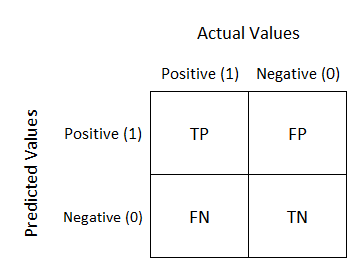

- TN(True Negative): 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0입니다.

- FP(False Positive): 예측값을 Positive 값 1로 예측했지만 실제 값은 Negative 값 0입니다.

- FN(False Negative): 예측값을 Negative 값 0으로 예측했지만 실제 값은 Positive 값 1입니다.

- TP(True Positive): 예측값을 Positive 값 1로 예측했고 실제 값 역시 Positive 값 1입니다.



---

휴식 중

---



# **3. 정밀도와 재현율**

## **3.1. 정밀도/재현율 트레이드오프**

## **3.2. 정밀도와 재현율의 맹점**

### **3.2.1. 정밀도가 100%가 되는 방법**

### **3.2.2. 재현율이 100%가 되는 방법**

# **4. F1 스코어**

# **5. ROC 곡선과 AUC**

# **6. 파마 인디언 당뇨병 예측**

# **7. 정리**